In [1]:
# the following code is with reference to 
# https://github.com/yhat/DataGotham2013
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
import re

#### import data and build up a df with data_key inside 

In [2]:
data = pd.read_csv("credit-data.csv")
data_key = pd.read_excel("Data Dictionary.xls")
data_key = data_key.iloc[:, 0:3].T.reset_index(drop=True)
data_key.rename(columns = data_key.loc[0], inplace = True)
data_key = data_key.drop([0])
data_updated = pd.concat([data, data_key])
data_updated.reset_index(drop = True, inplace = True)
df = pd.concat([data_updated.iloc[41016:41018,:], data_updated.drop([41016,41017], axis=0)], axis=0)
df = df.reset_index(drop = True)

In [3]:
df.head()

,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,PersonID,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs,age,zipcode
0,"Monthly debt payments, alimony,living costs di...",Monthly income,Number of dependents in family excluding thems...,Number of Open loans (installment like car loa...,Number of times borrower has been 30-59 days p...,Number of times borrower has been 60-89 days p...,Number of times borrower has been 90 days or m...,Number of mortgage and real estate loans inclu...,NaN,Total balance on credit cards and personal lin...,Person experienced 90 days past due delinquenc...,Age of borrower in years,zipcode of the borrower
1,percentage,real,integer,integer,integer,integer,integer,integer,NaN,percentage,Y/N,integer,interget/string
2,505,0,0,2,0,0,0,0,98976.0,1,0,55,60601
3,0.459565,15666,0,7,0,0,0,2,98991.0,0.547745,0,71,60601
4,0.0145204,4200,0,5,0,0,0,0,99012.0,0.0442802,0,51,60601


In [4]:
data.info(verbose = True)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      39979 non-null float64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


average age is 51.68 mean monthly income is roughly 6578 dollars and the median monthly income is 5250

In [5]:
df_1 = pd.melt(data)
null_variables = df_1.value.isnull()
print(null_variables.sum())
pd.crosstab(df_1.variable, null_variables)

9011


value,False,True
variable,,
DebtRatio,41016,0
MonthlyIncome,33042,7974
NumberOfDependents,39979,1037
NumberOfOpenCreditLinesAndLoans,41016,0
NumberOfTime30-59DaysPastDueNotWorse,41016,0
NumberOfTime60-89DaysPastDueNotWorse,41016,0
NumberOfTimes90DaysLate,41016,0
NumberRealEstateLoansOrLines,41016,0
PersonID,41016,0


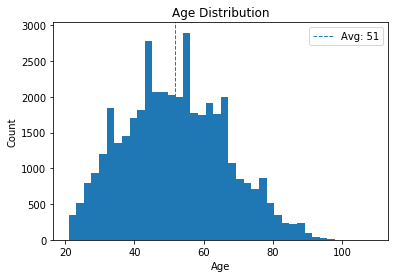

In [6]:
data.age.hist(bins=40, grid=False, linewidth=0.1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(data.age.mean(), label='Avg: {}'.format(int(data.age.mean())), linestyle='dashed', linewidth=1)
plt.legend()

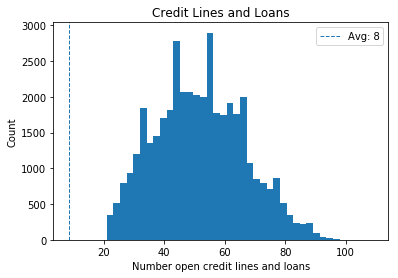

In [7]:
data.age.hist(bins=40, grid=False, linewidth=0.1)
plt.title('Credit Lines and Loans')
plt.xlabel('Number open credit lines and loans')
plt.ylabel('Count')
plt.axvline(data.NumberOfOpenCreditLinesAndLoans.mean(), label='Avg: {}'.format(int(data.NumberOfOpenCreditLinesAndLoans.mean())), linestyle='dashed', linewidth=1)
plt.legend()

In [8]:
# fill in missing values with means
for i in range(len(data.columns)):
    if data[data.columns[i]].hasnans:
        data[data.columns[i]].fillna(data[data.columns[i]].mean(), inplace = True)

In [9]:
for i in range(len(data.columns)):
    print(data[data.columns[i]].hasnans)

False
False
False
False
False
False
False
False
False
False
False
False
False


#### Generate Features/Predictors: For this assignment, you should write 
1. one function that can discretize a continuous variable and 
2. one function that can take a categorical variable and create binary/dummy variables from it. 
#### Apply them to at least one variable each in this data.


In [10]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (roc_curve, auc, classification_report, confusion_matrix)
import pprint
pp = pprint.PrettyPrinter(indent=2)

/home/bac2qh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
min(data.age)

21

In [12]:
109 - 21

88

In [13]:
# divide 21 - 109 into 8 groups

def discretize_cont_var(col_name, bins, group_name):
    new_var = col_name + '_group'
    data[new_var] = pd.cut(data[col_name], bins, labels = group_name)
    
age_group = ["21_32", "33_43", "44_54", "55_65", "66_76", "77_87", "88_98", "99_109"]

discretize_cont_var('age', 8, age_group)


In [14]:
# check the validation of descretization 
for i in [21, 32, 43, 54, 65, 76, 87, 98]:
    print(data[['age','age_group']][data.age == i].head(1), '\n')

     age age_group
150   21     21_32 

    age age_group
16   32     21_32 

    age age_group
23   43     33_43 

    age age_group
56   54     44_54 

    age age_group
86   65     55_65 

    age age_group
19   76     66_76 

     age age_group
450   87     77_87 

       age age_group
21972   98     88_98 



In [15]:
def cat_var(series):
    return pd.get_dummies(series)

cat_var(data.SeriousDlqin2yrs).head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


#### Build Classifier: For this assignment, select any classifier you feel comfortable with (Logistic Regression for example or Decision Trees)

In [16]:
df.columns

Index(['DebtRatio', 'MonthlyIncome', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'PersonID',
       'RevolvingUtilizationOfUnsecuredLines', 'SeriousDlqin2yrs', 'age',
       'zipcode'],
      dtype='object')

In [17]:
# the six parameters I would like to study
for i in ["DebtRatio", "MonthlyIncome", "NumberOfDependents", "age", "NumberOfOpenCreditLinesAndLoans"
         , "RevolvingUtilizationOfUnsecuredLines"]:
    print(i, " - ", df.loc[0, i], '\n')

DebtRatio  -  Monthly debt payments, alimony,living costs divided by monthy gross income 

MonthlyIncome  -  Monthly income 

NumberOfDependents  -  Number of dependents in family excluding themselves (spouse, children etc.) 

age  -  Age of borrower in years 

NumberOfOpenCreditLinesAndLoans  -  Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) 

RevolvingUtilizationOfUnsecuredLines  -  Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits 



In [18]:
classifiers = [KNeighborsClassifier(), LogisticRegression()]
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
            'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents']

In [19]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(data[features], data.SeriousDlqin2yrs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

#### Evaluate Classifier: you can use any metric you choose for this assignment (accuracy is the easiest one). Feel free to evaluate it on the same data you built the model on (this is not a good idea in general but for this assignment, it is fine). We haven't covered models and evaluation yet, so don't worry about creating validation sets or cross-validation.


I think accuracy, precision and recall rate are good metrics for this assignment. 

In [20]:
pp.pprint(classification_report(data.SeriousDlqin2yrs, clf.predict(data[features]), labels=[0, 1]))

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.84      1.00      0.91     34396\n'
 '          1       0.66      0.04      0.07      6620\n'
 '\n'
 'avg / total       0.81      0.84      0.78     41016\n')


precision is 0.81 and recall is 0.84. The metrics seems good and balanced. 